# Готовим данные

Тренировочный файл

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [3]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: float64(111), int64(259)
memory usage: 215.2 MB


In [5]:
y = list(train['TARGET'])

In [6]:
train = train.drop('TARGET', axis=1)

In [7]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Data columns (total 369 columns):
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64
imp_op_var39_efect_ult1          76020 non-null float

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Tree

In [11]:
dtc = DecisionTreeClassifier() #создание объекта класса - дерево принятия решения
dtc.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_1 = dtc.predict_proba(X_test)# предсказания
predict_1[:,1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [12]:
dtc = DecisionTreeClassifier(max_depth=3) #создание объекта класса - дерево принятия решения
dtc.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_2 = dtc.predict_proba(X_test)# предсказания
predict_2[:,1]

array([ 0.01613053,  0.01613053,  0.00636161, ...,  0.01613053,
        0.05472888,  0.05472888])

(-0.01, 1.01)

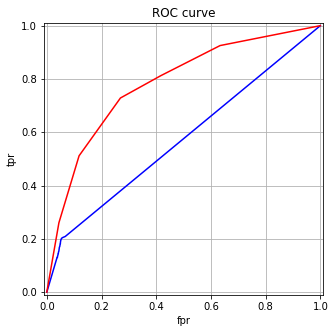

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_2[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr,color='b')
plt.plot(fpr2, tpr2,color='r')


#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

# LR restart  memory error

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [3]:
train=train [:3000]
train.shape

(3000, 370)

In [4]:
y = list(train['TARGET'])

In [5]:
train = train.drop('TARGET', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression() #создание объекта класса - дерево принятия решения
lr.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_1_lr = lr.predict_proba(X_test)# предсказания
predict_1_lr [:,1]

array([  2.76671354e-03,   1.93322753e-02,   8.92824721e-04,
         8.53272882e-05,   2.05931352e-02,   1.00513079e-02,
         1.15660403e-02,   6.33510329e-02,   2.02466886e-02,
         2.01922099e-02,   6.05348357e-02,   5.68176556e-02,
         3.51933852e-01,   3.51102026e-03,   6.76735642e-02,
         7.14527453e-02,   2.45507253e-01,   9.94112013e-05,
         2.19777455e-01,   8.11976724e-05,   1.65165133e-02,
         2.01943734e-02,   5.54698762e-06,   3.19296050e-04,
         4.17230991e-02,   2.59963303e-02,   9.02651845e-02,
         1.61423722e-01,   2.96665708e-02,   1.03648811e-01,
         6.15614675e-02,   4.46535852e-02,   2.14676141e-01,
         1.73965602e-01,   7.46025964e-03,   2.01922480e-02,
         1.81484993e-02,   4.55389030e-04,   1.75472655e-03,
         2.01801342e-02,   2.18438072e-01,   1.75684314e-03,
         1.90731374e-01,   5.17210005e-02,   5.09711988e-02,
         1.13419418e-01,   2.20408671e-01,   3.98387700e-02,
         6.79175069e-02,

In [10]:
lr = LogisticRegression(penalty='l2', C=10) #создание объекта класса - дерево принятия решения
lr.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_2_lr = lr.predict_proba(X_test)# предсказания
predict_2_lr [:,1]

array([  2.76671355e-03,   1.93322753e-02,   8.92824721e-04,
         8.53272882e-05,   2.05931352e-02,   1.00513079e-02,
         1.15660403e-02,   6.33510329e-02,   2.02466886e-02,
         2.01922099e-02,   6.05348357e-02,   5.68176556e-02,
         3.51933852e-01,   3.51102026e-03,   6.76735642e-02,
         7.14527453e-02,   2.45507253e-01,   9.94112013e-05,
         2.19777455e-01,   8.11976724e-05,   1.65165133e-02,
         2.01943734e-02,   5.54698762e-06,   3.19296050e-04,
         4.17230991e-02,   2.59963303e-02,   9.02651845e-02,
         1.61423722e-01,   2.96665708e-02,   1.03648811e-01,
         6.15614675e-02,   4.46535852e-02,   2.14676141e-01,
         1.73965602e-01,   7.46025964e-03,   2.01922480e-02,
         1.81484993e-02,   4.55389030e-04,   1.75472655e-03,
         2.01801342e-02,   2.18438072e-01,   1.75684314e-03,
         1.90731374e-01,   5.17210005e-02,   5.09711988e-02,
         1.13419418e-01,   2.20408671e-01,   3.98387700e-02,
         6.79175069e-02,

(-0.01, 1.01)

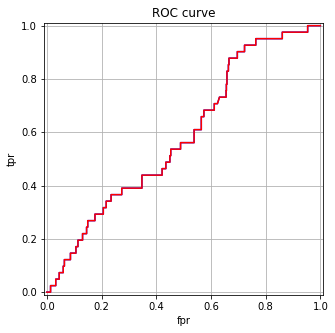

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_1_lr[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_2_lr[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr,color='b')
plt.plot(fpr2, tpr2,color='r')


#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

# KNeighbors restart memory error

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [3]:
train=train [:3000]
train.shape

(3000, 370)

In [4]:
y = list(train['TARGET'])

In [5]:
train = train.drop('TARGET', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier 


In [9]:
knc = KNeighborsClassifier() #создание объекта класса - дерево принятия решения
knc.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_1_knc = knc.predict_proba(X_test)# предсказания
predict_1_knc[:,1]

array([ 0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,
        0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0.2,  0.2,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0.2,  0.2,  0.2,  0. ,
        0. ,  0.2,  0.2,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.2,  0. ,  0.2,  0.4,  0.2,  0. ,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,
        0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0.2,  0

In [12]:
knc = KNeighborsClassifier(n_neighbors=10) #создание объекта класса - дерево принятия решения
knc.fit(X_train, y_train) # fit - обучаем машину, передаем dataframe, y - ответы
predict_2_knc = knc.predict_proba(X_test)# предсказания
predict_2_knc[:,1]

array([ 0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0.1,  0. ,  0. ,  0.2,  0. ,
        0. ,  0. ,  0. ,  0.1,  0.1,  0. ,  0.1,  0.1,  0.1,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0.1,  0.1,  0.1,  0. ,
        0.1,  0.2,  0.1,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,
        0.1,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0. ,
        0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.1,  0. ,  0.1,  0.2,  0.1,  0. ,  0.1,  0. ,  0.1,
        0.1,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0.1,  0.2,  0.1,  0. ,
        0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,
        0. ,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.1,  0. ,  0.1,  0.1,  0. ,  0. ,  0.2,  0. ,  0.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,
        0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0.2,  0

(-0.01, 1.01)

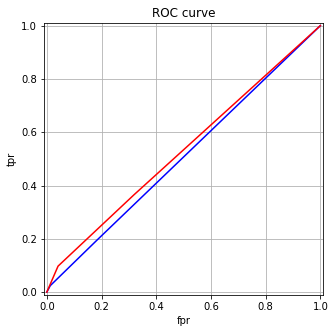

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_1_knc[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_2_knc[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr,color='b')
plt.plot(fpr2, tpr2,color='r')


#plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))